# Data Science Take Home Test
## Data Summary
Data summary for March data of Yellow Taxi from New York. <br>
Data has been cleaned beforehand in "Carto - March.ipynb" script

### Import libraries & Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
start_time = time.time()

In [2]:
df_mes = pd.read_csv('I:\Javier Resano\Curriculum\Caso Carto\March_data.txt', encoding='utf-8', sep='\t')

In [3]:
df_mes['tpep_pickup_datetime'] = pd.to_datetime(df_mes['tpep_pickup_datetime'])
df_mes['tpep_dropoff_datetime'] = pd.to_datetime(df_mes['tpep_dropoff_datetime'])
df_mes['PULocationID'] = df_mes['PULocationID'].astype(str)
df_mes['DOLocationID'] = df_mes['DOLocationID'].astype(str)
df_mes['payment_type'] = df_mes['payment_type'].astype(str)
df_mes['RatecodeID'] = df_mes['RatecodeID'].astype(str)
df_mes['VendorID'] = df_mes['VendorID'].astype(str)

### Statistic Data Analysis
#### Numeric variables

In [4]:
with pd.option_context('float_format', '{:.2f}'.format): print(df_mes.describe())

       passenger_count  trip_distance  fare_amount       extra     mta_tax  \
count      10171484.00    10171484.00  10171484.00 10171484.00 10171484.00   
mean              1.62           2.84        12.70        0.32        0.50   
std               1.26           3.59        54.94        0.37        0.03   
min               0.00           0.01         0.01        0.00        0.00   
25%               1.00           0.96         6.50        0.00        0.50   
50%               1.00           1.60         9.50        0.00        0.50   
75%               2.00           3.00        14.50        0.50        0.50   
max               9.00         332.40    171861.78        1.50        0.50   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count 10171484.00   10171484.00            10171484.00   10171484.00   
mean         1.83          0.29                   0.30         15.95   
std          2.48          1.81                   0.00         55.50   
min      

Here we can see that the ranges of all variables have results within expected ranges.
- Number of rows (taxi trips) is 10171481 for March, after data cleaning where we removed not valid rows
- Biggest variability appears in "fare_amount", "total_amount", "tolls_amount" and "travel_time", where std is more than 3 times the mean value
- On the other extreme, "mta_tax" is almost always 0.5 (it has a very low std), and "improvement_surcharge" is always 0.3 (its std is 0)

#### Code variables

In [5]:
pd.DataFrame(df_mes['VendorID'].value_counts())

,VendorID
2,5526257
1,4645227


Both codes seem to be more or less equally represented

In [6]:
pd.DataFrame(df_mes['RatecodeID'].value_counts())

,RatecodeID
1,9960548
2,172695
3,19400
5,13858
4,4965
6,18


Most common Rate is, by far, "1" (Standard Rate).
With around 1% or 2% of the amount of "1", next is "2" (JFK)
The rest have an even lower share of the trips, with 1/10th of those to JFK or 1/1000th of those standard, at most.

In [7]:
pd.DataFrame(df_mes['payment_type'].value_counts())

,payment_type
1,6936865
2,3184488
3,38499
4,11632


Share between "credit card" (1) and "cash" (2) payments is around 2/3 to 1/3. The rest of payment types (No charge, dispute) together are around 0.5% of the payments. Small in percentage, but still numerous in figures.

In [8]:
pd.DataFrame(df_mes['store_and_fwd_flag'].value_counts())

,store_and_fwd_flag
N,10110763
Y,60721


Most of the taxis enjoy good connection to the servers, since "store_and_fwd_flag" is almost always N. <br>
Only around 0.6% cases store the data in the car to be sent afterwards

#### Correlation analysis

In [9]:
corr_matrix = df_mes.corr()

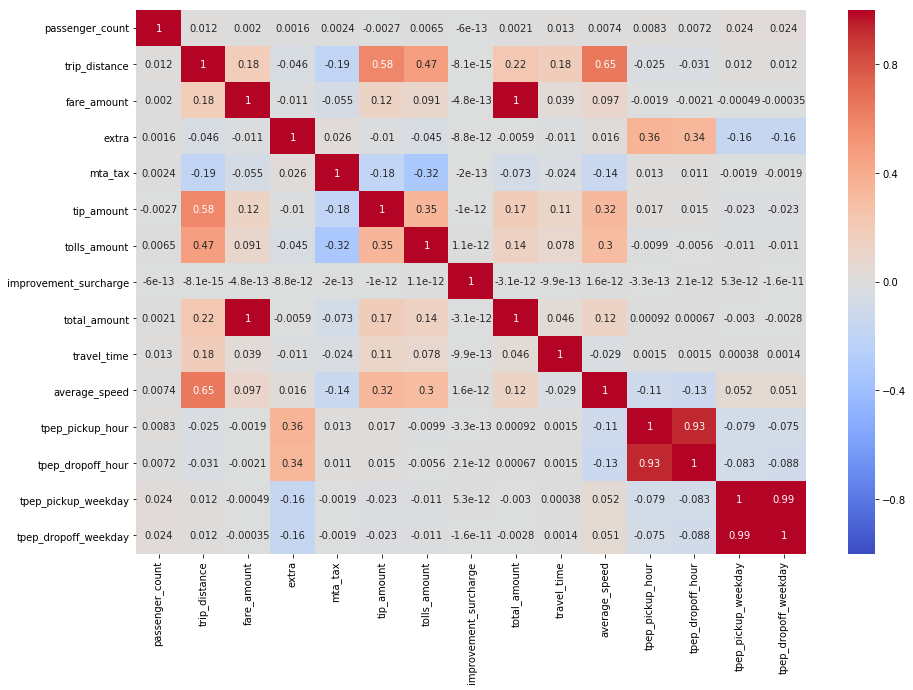

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

From this heatmap we can observe:
- tpep_pickup_hour and tpep_dropoff_hour are very related (as expected)
- tpep_pickup_weekday and tpep_dropoff_weekday are very related (as expected)
- total_amount and fare_amount are very related (as expected) <br>
Apart from these, biggest relation is between:
- tip_amount:
> - Mostly with trip_distance
> - Also related with tolls_amount and average_speed. Interesting for our task. The longer the trip, and the most tolls, the bigger the tip seems to be
> - Tip_amount is also related, albeit less, to fare_amount and total_amount, travel_time and inversely to mta_tax (if less tax, tip tends to be bigger)
- trip_distance:
> - Mostly with average_speed, tip_amount and tolls_amount.
> - Also, but less, with fare_amount, travel_time, total_amount and inversely to mta_tax (if less tax, tip tends to be longer)
- tolls_amount:
> - Mostly with trip_distance.
> - Also, but less, with tip_amount and average_speed, and inversely to mta_tax (if less tax, tolls tends to be bigger)
> - A bit related to fare_amount and total_amount. But less than expected, maybe.
- extra
> - As expected, its relation is with the hour and day of the trips
- Total_amount
> - Most related to trip_distance, tip_amount and tolls_amount. It was to be expected.
- mta_tax
> - most related (inversely) to tolls amount
> - Also, but less (also inversely), to trip_distance, average_speed and tip_amount
- fare_amount
> - a bit related to trip_distance, tolls_amount, average_speed and tip_amount
- average_speed
> - Most related to trip_distance (probably because longer trips leave the city and thus car can go faster),
> - Also related to tip_amount and toll_amount. Here, probably tolled ways are probably less busy, and in places where speed limit is higher. Also, faster trips probably cause higher tips
> - a bit related to fare_amount, total_amount, and inversely related to mta_tax and the hours.

### Further Data Analysis

Text(27.5973,0.5,'fare_amount')

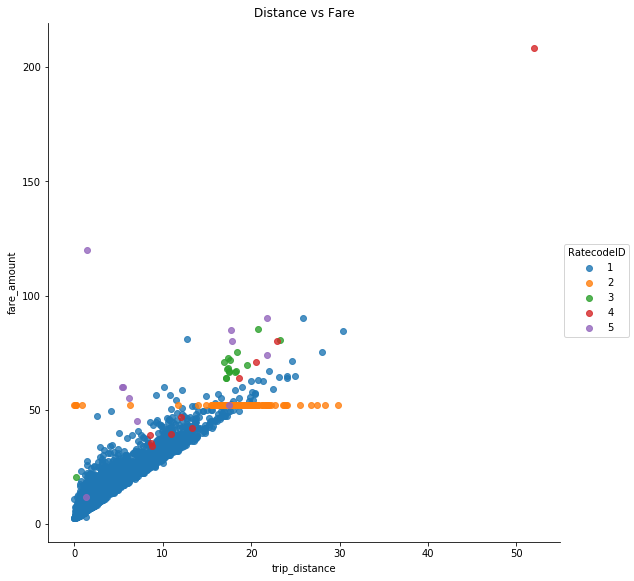

In [11]:
sns.lmplot(x='trip_distance', # Horizontal axis
           y='fare_amount', # Vertical axis
           data=df_mes.sample(n=10000, random_state=0), # Data source
           fit_reg=False, # Don't fix a regression line
           hue="RatecodeID",
           size=8,
           aspect=1) # Set color
# Set title
plt.title('Distance vs Fare')
# Set x-axis label
plt.xlabel('trip_distance')
# Set y-axis label
plt.ylabel('fare_amount')

We can see that:
- "2" RatecodeID (orange; JFK, according to Data Dictionary), refers to a fixed rate. 
- The rest (specially blue, "standard rate") are all above a straight line that increases fare with distance.
- If we look deeper, RatecodeID "3" (green; Newark) usually corresponds to longer trips, and over a line higher than the rest (perhaps it adds a fixed rate at the start of the trip)
- rates "4" and "5" (Nassau and Negotiated fare) are not far from the base line that marks the blue line minimum, but in all cases seem to charge more than the minimum rate.

In [12]:
df=df_mes.loc[:,['PULocationID','DOLocationID','VendorID']].groupby(['PULocationID','DOLocationID']).count().sort_values(by=['VendorID'], ascending=False).head(10)
df.columns=['Num Trips']
df

Num Trips
PULocationID DOLocationID           
264          264              149871
237          236               52906
236          236               47309
             237               43501
237          237               40803
239          238               29069
             142               27116
142          239               26179
238          239               24984
79           79                24291

These are the 10 most common trips in the month of March, based on Origin and Destination Taxi Zone

Text(0,0.5,'Count')

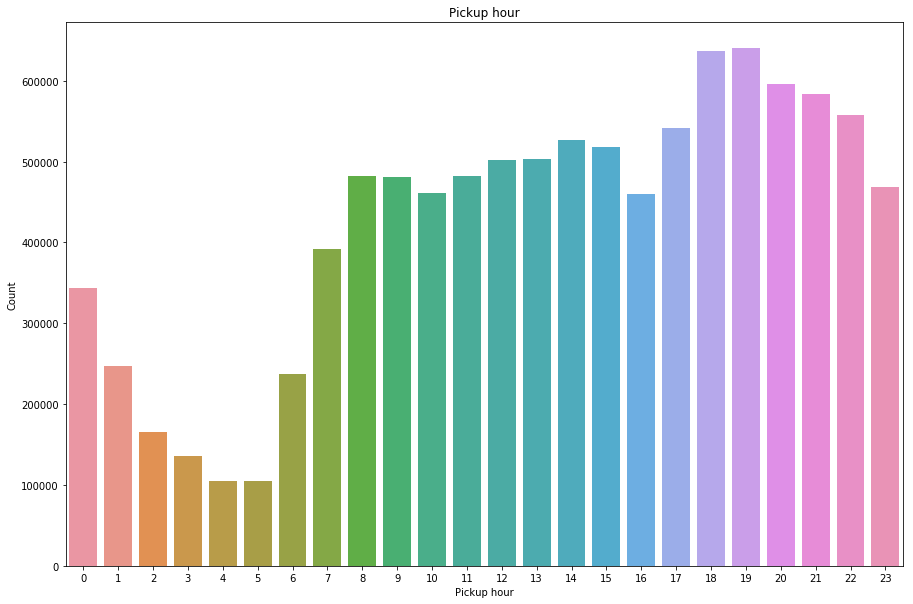

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x="tpep_pickup_hour", data=df_mes)
# Set title
plt.title('Pickup hour')
# Set x-axis label
plt.xlabel('Pickup hour')
# Set y-axis label
plt.ylabel('Count')

We can see that the hours with lowest demand for taxis are around 4-5 in the morning, while the peak is in the evening (18-19h)

Text(0,0.5,'Count')

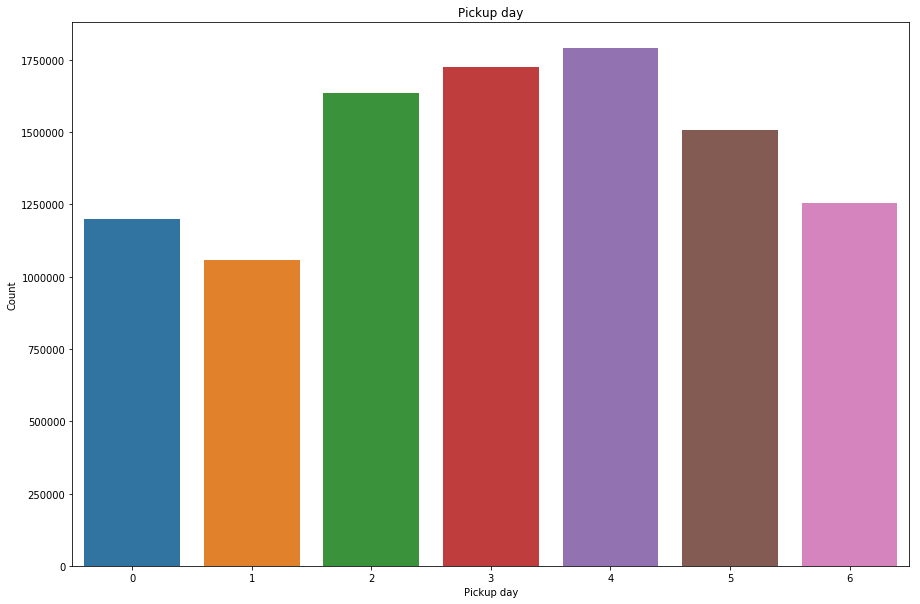

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x="tpep_pickup_weekday", data=df_mes)
# Set title
plt.title('Pickup day')
# Set x-axis label
plt.xlabel('Pickup day')
# Set y-axis label
plt.ylabel('Count')

In this graph, week starts on Monday, so lowest demand days are Sunday, Monday and Tuesday, while highest demand ones are Thursday and Friday

Text(0,0.5,'average speed')

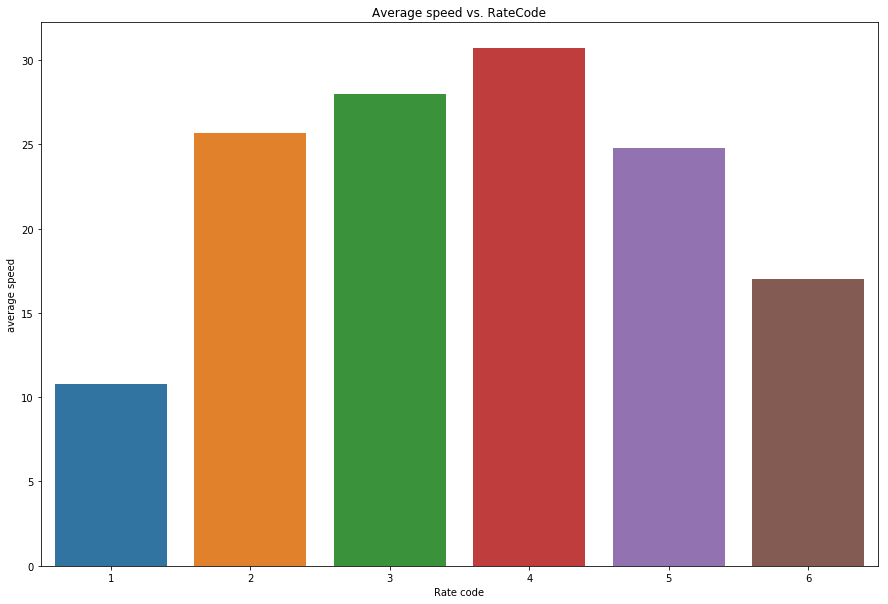

In [25]:
df=df_mes.groupby(['RatecodeID'])['average_speed'].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="RatecodeID", y="average_speed", data=df)
# Set title
plt.title('Average speed vs. RateCode')
# Set x-axis label
plt.xlabel('Rate code')
# Set y-axis label
plt.ylabel('average speed')

We can see that trips under code 1 (standard rate) are the slowest. The main reason for this is probably that these trips are the ones most commonly happening within the city, where traffic makes the speed lower. The highest speed ones (2, 3, 4) correspond to either airports (2- JFK; 3- Newark) or counties near NY (4- Nassau or Westchester).